In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install langchain_community

In [ ]:
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Luxury watch.csv to Luxury watch.csv


In [ ]:
LWP = pd.read_csv('Luxury watch.csv')
LWP.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"


In [ ]:
# mengetahui banyaknya dataset
LWP.tail()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500"
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800"
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000"
506,Frederique Constant,Classics,Stainless Steel,Leather,Automatic,50 meters,40.0,10.60,20.0,Silver,Sapphire,Date,38 hours,"1,200"


In [ ]:
# mengetahui banyaknya brand dalam dataset
LWP['Brand'].value_counts()

,count
Brand,
IWC,39
Audemars Piguet,38
Patek Philippe,33
Zenith,30
Blancpain,29
Rolex,27
Breguet,26
Hublot,26
Vacheron Constantin,25


**VISUALISASI DATA**

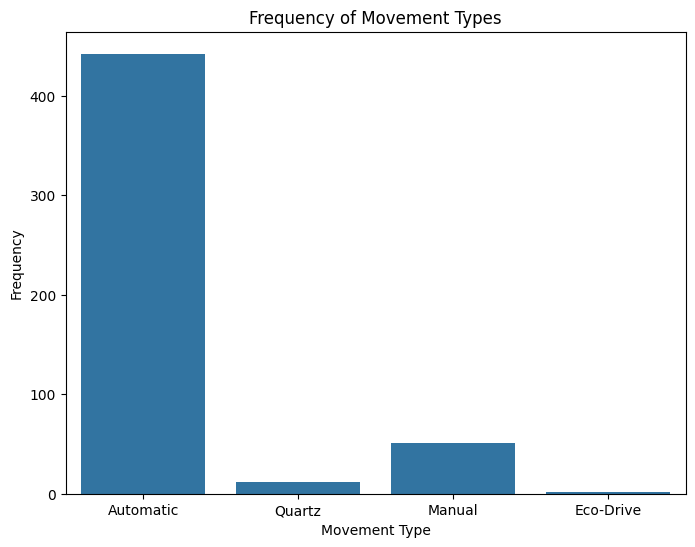

In [ ]:
# memvisualisasikan kolom Movement Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Movement Type', data=LWP)
plt.xlabel('Movement Type')
plt.ylabel('Frequency')
plt.title('Frequency of Movement Types')
plt.show()

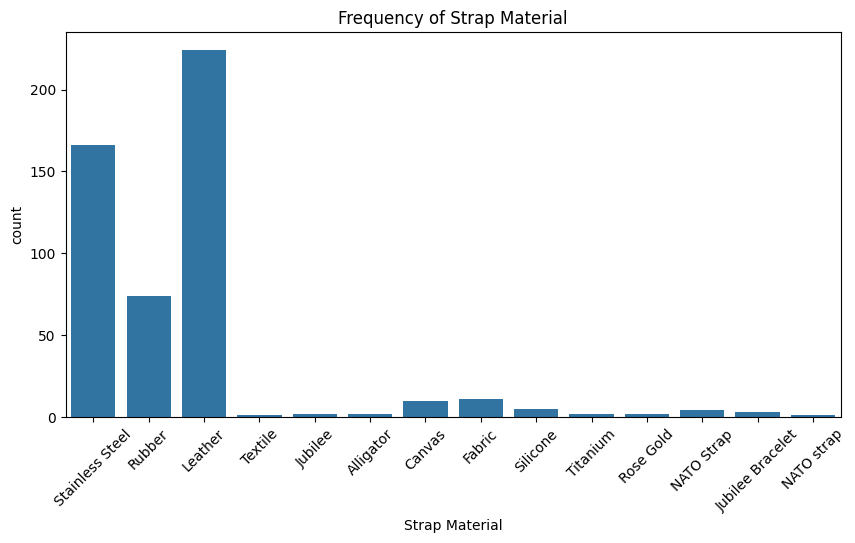

In [ ]:
# memvisualisasikan kolom Strap Material
plt.figure(figsize=(10,5))
sns.countplot(x='Strap Material', data=LWP)
plt.xticks(rotation=45)
plt.title('Frequency of Strap Material')
plt.show()

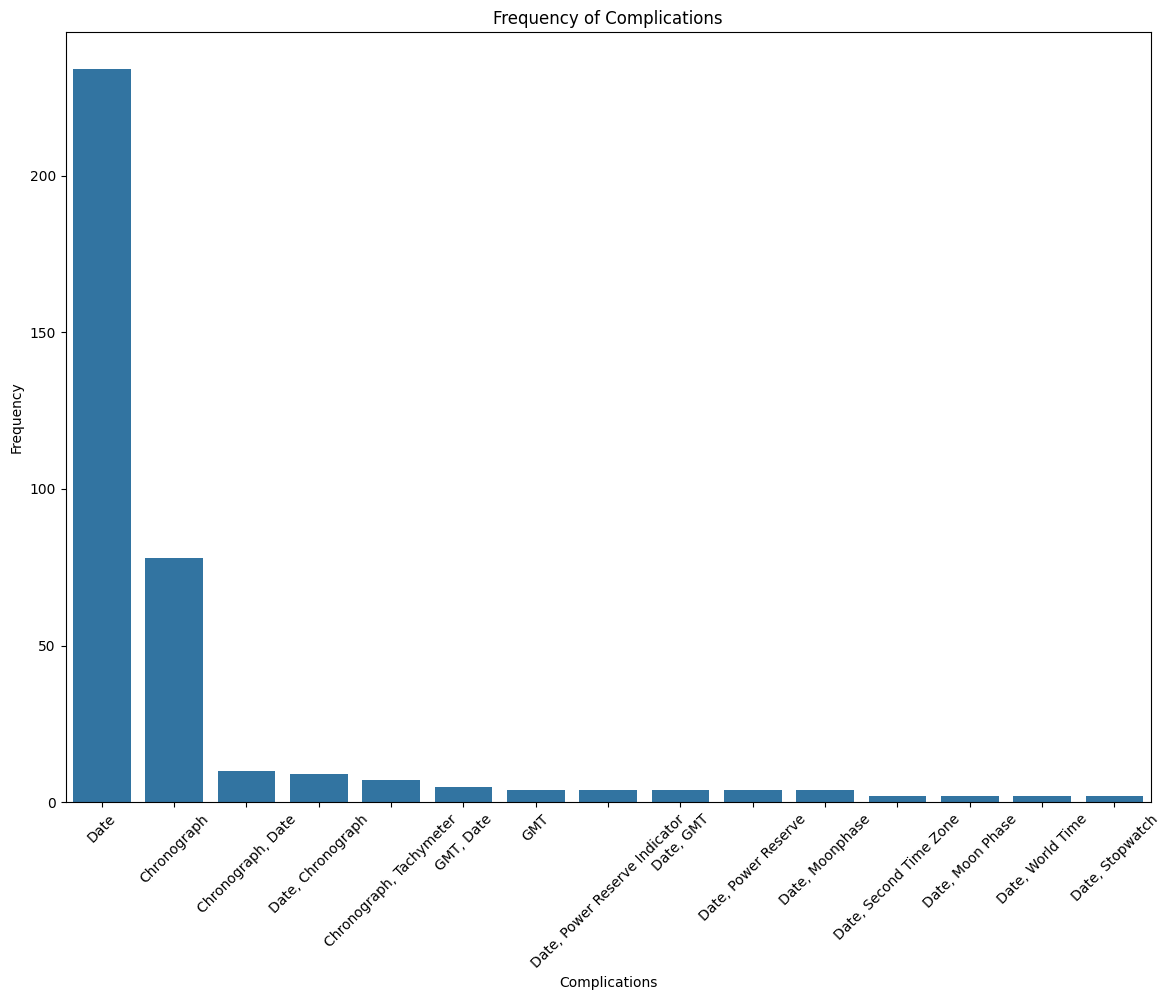

In [ ]:
# memvisualisasikan kolom Complications (fitur pada dial jam)
plt.figure(figsize=(14, 10))
sns.countplot(x='Complications', data=LWP, order=LWP['Complications'].value_counts().iloc[:15].index)
plt.xticks(rotation=45)
plt.xlabel('Complications')
plt.ylabel('Frequency')
plt.title('Frequency of Complications')
plt.show()

In [ ]:
from google.colab import userdata
import os

In [ ]:
api_token = userdata.get('api_token')
os.environ['REPLICATE_API_TOKEN'] = api_token

In [ ]:
from langchain_community.llms import Replicate


In [ ]:
llm = Replicate(
model="ibm-granite/granite-3.3-8b-instruct"
)


In [ ]:
# filter hanya Rolex
rolex_df = LWP[LWP['Brand'] == 'Rolex']

for idx, row in rolex_df.iterrows():
    prompt = f"""
    Respond in JSON format with keys: Rolex Price, Movement types, complications.
    Text:
    {row.to_dict()}
    """
    print(prompt)


    Respond in JSON format with keys: Rolex Price, Movement types, complications.
    Text:
    {'Brand': 'Rolex', 'Model': 'Submariner', 'Case Material': 'Stainless Steel', 'Strap Material': 'Stainless Steel', 'Movement Type': 'Automatic', 'Water Resistance': '300 meters', 'Case Diameter (mm)': 40.0, 'Case Thickness (mm)': 13.0, 'Band Width (mm)': 20.0, 'Dial Color': 'Black', 'Crystal Material': 'Sapphire', 'Complications': 'Date', 'Power Reserve': '48 hours', 'Price (USD)': '9,500'}
    

    Respond in JSON format with keys: Rolex Price, Movement types, complications.
    Text:
    {'Brand': 'Rolex', 'Model': 'GMT-Master II', 'Case Material': 'Stainless Steel', 'Strap Material': 'Stainless Steel', 'Movement Type': 'Automatic', 'Water Resistance': '100 meters', 'Case Diameter (mm)': 40.0, 'Case Thickness (mm)': 12.5, 'Band Width (mm)': 20.0, 'Dial Color': 'Black', 'Crystal Material': 'Sapphire', 'Complications': 'GMT', 'Power Reserve': '48 hours', 'Price (USD)': '14,000'}
    

    

In [ ]:
columns_to_show = ["Brand", "Price (USD)", "Movement Type", "Complications"]
rolex_table = rolex_df[columns_to_show]
display(rolex_table)


,Brand,Price (USD),Movement Type,Complications
0,Rolex,"9,500",Automatic,Date
21,Rolex,"14,000",Automatic,GMT
28,Rolex,"9,000",Automatic,Date
61,Rolex,"8,900",Automatic,Date
83,Rolex,"9,500",Automatic,Date
127,Rolex,"9,950",Automatic,"GMT, Date"
138,Rolex,"8,200",Automatic,Date
171,Rolex,"8,000",Automatic,Date
207,Rolex,"9,100",Automatic,"GMT, Date"
214,Rolex,"8,900",Automatic,Date


In [ ]:
from IPython.display import display

**INGIN MELIHAT 10  REKOMENDASI JAM ROLEX**

In [ ]:
# Filter Rolex saja
rolex_df = LWP[LWP['Brand'] == 'Rolex']

# Urutkan berdasarkan harga dari yang termurah
rolex_sorted = rolex_df.sort_values(by='Price (USD)', ascending=True)

# Ambil 10 rekomendasi pertama
top10_recommendations = rolex_sorted.head(10)

# Tampilkan tabel rapi
display(top10_recommendations)

# tampilkan juga dalam bentuk markdown table (buat LLM/prompt)
print(top10_recommendations[["Brand","Price (USD)","Movement Type","Complications"]].to_markdown(index=False))

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
420,Rolex,Daytona,Stainless Steel,Stainless Steel,Automatic,100 meters,40.0,12.4,20.0,White,Sapphire,Chronograph,72 hours,"13,500"
21,Rolex,GMT-Master II,Stainless Steel,Stainless Steel,Automatic,100 meters,40.0,12.5,20.0,Black,Sapphire,GMT,48 hours,"14,000"
313,Rolex,Daytona,18k Yellow Gold,Leather,Automatic,100 meters,40.0,12.4,20.0,Champagne,Sapphire,Chronograph,72 hours,"29,500"
269,Rolex,Daytona,Yellow Gold,Leather,Automatic,100 meters,40.0,12.4,20.0,Ivory,Sapphire,Chronograph,72 hours,"39,500"
280,Rolex,Datejust,Stainless Steel,Stainless Steel,Automatic,100 meters,36.0,12.5,20.0,Black,Sapphire,Date,70 hours,"6,500"
335,Rolex,Datejust,Stainless Steel,Stainless Steel,Automatic,100 meters,36.0,12.5,20.0,Blue,Sapphire,"Date, Cyclops",70 hours,"7,400"
388,Rolex,Datejust,Stainless Steel,Stainless Steel,Automatic,100 meters,36.0,12.0,20.0,Silver,Sapphire,Date,70 hours,"7,500"
486,Rolex,Datejust,Stainless Steel,Jubilee Bracelet,Automatic,100 meters,36.0,12.0,20.0,Blue,Sapphire,Date,70 hours,"7,650"
258,Rolex,Datejust,Stainless Steel,Stainless Steel,Automatic,100 meters,41.0,11.8,21.0,Blue,Sapphire,Date,70 hours,"7,800"
399,Rolex,Datejust,Stainless Steel,Stainless Steel,Automatic,100 meters,41.0,11.7,20.0,White,Sapphire,Date,70 hours,"8,000"


| Brand   | Price (USD)   | Movement Type   | Complications   |
|:--------|:--------------|:----------------|:----------------|
| Rolex   | 13,500        | Automatic       | Chronograph     |
| Rolex   | 14,000        | Automatic       | GMT             |
| Rolex   | 29,500        | Automatic       | Chronograph     |
| Rolex   | 39,500        | Automatic       | Chronograph     |
| Rolex   | 6,500         | Automatic       | Date            |
| Rolex   | 7,400         | Automatic       | Date, Cyclops   |
| Rolex   | 7,500         | Automatic       | Date            |
| Rolex   | 7,650         | Automatic       | Date            |
| Rolex   | 7,800         | Automatic       | Date            |
| Rolex   | 8,000         | Automatic       | Date            |


**INGIN MELIHAT 10 JAM ROLEX TERMURAH**

In [ ]:
prompt = f"""
Here is a table of the 10 cheapest Rolex watches:

{top10_recommendations[["Brand","Price (USD)","Movement Type","Complications"]].to_markdown(index=False)}

From these 10 Rolex watches, which one do you recommend the most, and why?
Please explain the reasoning (e.g., value for money, movement type, or complications).
"""

print(prompt)


Here is a table of the 10 cheapest Rolex watches:

| Brand   | Price (USD)   | Movement Type   | Complications   |
|:--------|:--------------|:----------------|:----------------|
| Rolex   | 13,500        | Automatic       | Chronograph     |
| Rolex   | 14,000        | Automatic       | GMT             |
| Rolex   | 29,500        | Automatic       | Chronograph     |
| Rolex   | 39,500        | Automatic       | Chronograph     |
| Rolex   | 6,500         | Automatic       | Date            |
| Rolex   | 7,400         | Automatic       | Date, Cyclops   |
| Rolex   | 7,500         | Automatic       | Date            |
| Rolex   | 7,650         | Automatic       | Date            |
| Rolex   | 7,800         | Automatic       | Date            |
| Rolex   | 8,000         | Automatic       | Date            |

From these 10 Rolex watches, which one do you recommend the most, and why?
Please explain the reasoning (e.g., value for money, movement type, or complications).



In [ ]:
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
jawaban_ai = llm.invoke(prompt)
print(jawaban_ai)

Based on the provided table of 10 cheapest Rolex watches, I would recommend the Rolex with a price of $6,500. Here's the reasoning:

1. **Value for Money**: This particular Rolex model offers the best value for money among the listed options. At $6,500, it is significantly cheaper than the others, making it more accessible to those interested in owning a Rolex without breaking the bank.

2. **Movement Type**: All the Rolex watches listed have automatic movements, which are renowned for their reliability and precision. This specific model also uses an automatic movement, ensuring consistent performance without the need for manual winding.

3. **Complications**: The recommended model features a simple yet essential complication - a Date function. While other models have additional complications like GMT or Chronograph functions, these usually come at a higher price point. The Date complication is practical, easy to use, and a hallmark of Rolex's quality.

4. **Simplicity and Timeless Des

In [ ]:
LWP['Price (USD)'] = (
    LWP['Price (USD)']
    .replace('[\$,]', '', regex=True)  # hapus simbol $ dan koma
    .astype(float)                     # ubah ke float
)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3310327300.py:3: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)  # hapus simbol $ dan koma


In [ ]:
#Ingin bertanya rekomendasi jam jika punya uang 1000$

# Filter hanya jam tangan dengan harga <= 1000
budget_df = LWP[LWP['Price (USD)'] <= 1000]

# Urutkan termurah
budget_sorted = budget_df.sort_values(by='Price (USD)', ascending=True)

# Ambil 50 rekomendasi
top50_budget = budget_sorted.head(50)

# Tampilkan tabel rapi di notebook
display(top50_budget)

# Buat prompt ke LLM
prompt = f"""
Here is a table of 50 watches priced under 1000:

{top50_budget[["Brand","Price (USD)","Movement Type","Complications"]].to_markdown(index=False)}

Please recommend which of these watches are the best to buy within a budget of 1000.
Return the answer in a markdown table with the following columns:
- Brand
- Price (USD)
- Movement
- Complications
- Why Recommended
"""

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
9,Hamilton,Khaki Field,Stainless Steel,Leather,Automatic,100 meters,38.0,9.80,20.0,Black,Sapphire,NaN,80 hours,495.0
92,Hamilton,Khaki Field Auto,Stainless Steel,Leather,Automatic,100 meters,38.0,9.85,20.0,Black,Sapphire,NaN,80 hours,545.0
224,Hamilton,Khaki Field,Stainless Steel,NATO Strap,Automatic,100 meters,38.0,9.70,20.0,Black,Sapphire,NaN,80 hours,595.0
8,Tissot,Le Locle,Stainless Steel,Leather,Automatic,30 meters,39.3,9.75,19.0,White,Sapphire,Date,38 hours,650.0
93,Bulova,Precisionist,Stainless Steel,Stainless Steel,Quartz,300 meters,46.5,17.50,24.0,Black,Mineral,Chronograph,NaN,650.0
90,Seiko,Prospex,Stainless Steel,Silicone,Automatic,200 meters,42.3,13.40,22.0,Blue,Hardlex,NaN,50 hours,650.0
161,Tissot,Le Locle,Stainless Steel,Leather,Automatic,30 meters,39.3,9.75,20.0,Silver,Sapphire,Date,38 hours,650.0
91,Citizen,Promaster,Titanium,Titanium,Eco-Drive,200 meters,46.5,15.00,23.0,Black,Sapphire,Chronograph,210 days,995.0


In [ ]:
jawaban_ai = llm.invoke(prompt)
print(jawaban_ai)

Here are the recommended watches from the table, within a budget of 1000 USD:

| Brand    | Price (USD) | Movement   | Complications | Why Recommended                                                                                   |
|----------|-------------|------------|--------------|---------------------------------------------------------------------------------------------------|
| Hamilton | 495         | Automatic  | nan          | Affordable price, reliable brand with good automatic movements, no complications to compromise |
| Hamilton | 545         | Automatic  | nan          | Slightly higher price point, still offers a dependable automatic movement from a trusted brand  |
| Hamilton | 595         | Automatic  | nan          | Slightly more expensive Hamilton, but maintains quality and brand reputation                         |
| Tissot   | 650         | Automatic  | Date         | Offers a balance of price, brand recognition, and useful date complication                  

In [ ]:
# Filter jam tangan <= 1000
budget_df = LWP[LWP['Price (USD)'] <= 1000]

# Ambil 10 termurah
top10_budget = budget_df.sort_values(by='Price (USD)').head(10)

# Tampilkan tabel
display(top10_budget)

# Buat prompt ke AI
prompt = f"""
Here is a table of 10 watches priced under 1000:

{top10_budget[["Brand","Price (USD)","Movement Type","Complications"]].to_markdown(index=False)}

Task:
- Recommend the best watches to buy within a budget of 1000.
- Provide a ranking of the 10 watches from most recommended to least.
- Explain briefly in a table why each watch is recommended
  (e.g., value for money, movement type, complications, brand reputation).

Return the answer in a markdown table with the following columns:
Rank | Brand | Price (USD) | Movement Type | Complications | Why Recommended
"""

print(prompt)
jawaban_ai = llm.invoke(prompt)
print(jawaban_ai)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
9,Hamilton,Khaki Field,Stainless Steel,Leather,Automatic,100 meters,38.0,9.80,20.0,Black,Sapphire,NaN,80 hours,495.0
92,Hamilton,Khaki Field Auto,Stainless Steel,Leather,Automatic,100 meters,38.0,9.85,20.0,Black,Sapphire,NaN,80 hours,545.0
224,Hamilton,Khaki Field,Stainless Steel,NATO Strap,Automatic,100 meters,38.0,9.70,20.0,Black,Sapphire,NaN,80 hours,595.0
8,Tissot,Le Locle,Stainless Steel,Leather,Automatic,30 meters,39.3,9.75,19.0,White,Sapphire,Date,38 hours,650.0
93,Bulova,Precisionist,Stainless Steel,Stainless Steel,Quartz,300 meters,46.5,17.50,24.0,Black,Mineral,Chronograph,NaN,650.0
90,Seiko,Prospex,Stainless Steel,Silicone,Automatic,200 meters,42.3,13.40,22.0,Blue,Hardlex,NaN,50 hours,650.0
161,Tissot,Le Locle,Stainless Steel,Leather,Automatic,30 meters,39.3,9.75,20.0,Silver,Sapphire,Date,38 hours,650.0
91,Citizen,Promaster,Titanium,Titanium,Eco-Drive,200 meters,46.5,15.00,23.0,Black,Sapphire,Chronograph,210 days,995.0



Here is a table of 10 watches priced under 1000:

| Brand    |   Price (USD) | Movement Type   | Complications   |
|:---------|--------------:|:----------------|:----------------|
| Hamilton |           495 | Automatic       | nan             |
| Hamilton |           545 | Automatic       | nan             |
| Hamilton |           595 | Automatic       | nan             |
| Tissot   |           650 | Automatic       | Date            |
| Bulova   |           650 | Quartz          | Chronograph     |
| Seiko    |           650 | Automatic       | nan             |
| Tissot   |           650 | Automatic       | Date            |
| Citizen  |           995 | Eco-Drive       | Chronograph     |

Task:
- Recommend the best watches to buy within a budget of 1000.
- Provide a ranking of the 10 watches from most recommended to least.
- Explain briefly in a table why each watch is recommended 
  (e.g., value for money, movement type, complications, brand reputation).

Return the answer in a ma

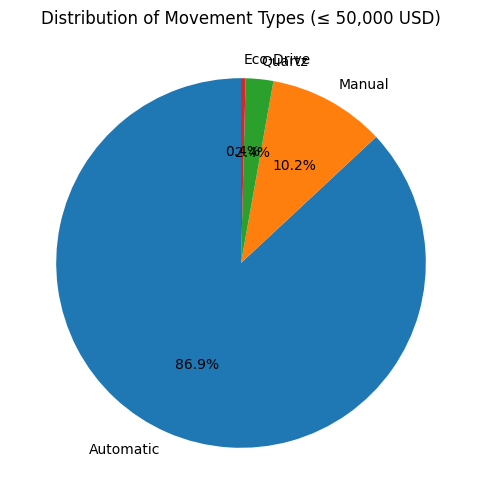

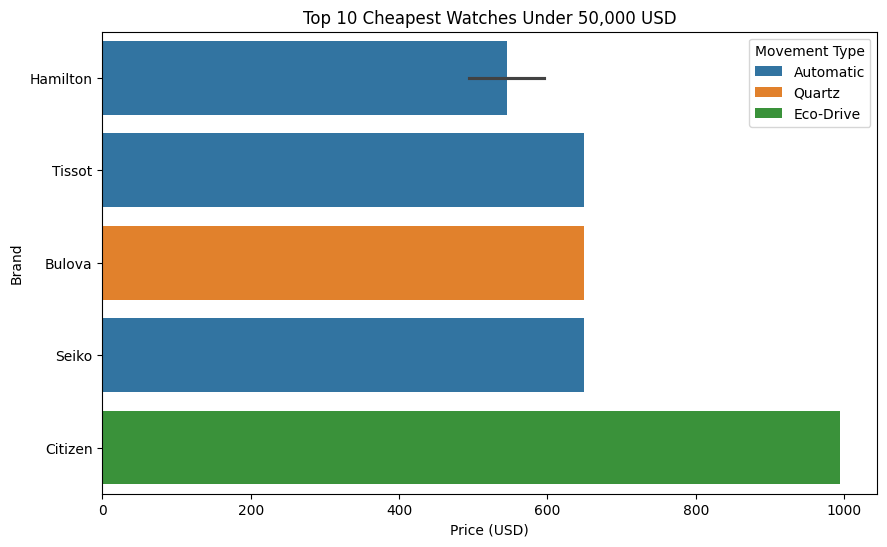

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(movement_count.values, labels=movement_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Movement Types (≤ 50,000 USD)")
plt.show()

#Horizontal bar chart 10 jam tangan termurah
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_budget,
    y="Brand",
    x="Price (USD)",
    hue="Movement Type",
    dodge=False
)
plt.title("Top 10 Cheapest Watches Under 50,000 USD")
plt.xlabel("Price (USD)")
plt.ylabel("Brand")
plt.legend(title="Movement Type")
plt.show()